In [1]:
import os

import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [2]:
# Load Data
loan_approval_data = pd.read_csv("loan_approval_data.csv")
loan_approval_data.head()

,credit_score,income,employment_status,loan_amount,loan_purpose,credit_history,loan_term_months,interest_rate,loan_approved
0,612,71450,unemployed,6411,other,excellent,48,0.07,False
1,517,47532,self-employed,6284,business,fair,60,0.09,False
2,700,72278,unemployed,15477,car purchase,excellent,60,0.08,False
3,525,63237,employed,6223,debt consolidation,excellent,48,0.06,False
4,682,54053,student,7236,vacation,fair,60,0.05,True


In [3]:
# Label encoder to convert String to numeric values for the target variable
label_encoder = preprocessing.LabelEncoder()
loan_approval_data["loan_approved"] = label_encoder.fit_transform(loan_approval_data["loan_approved"])
loan_approval_data.head()

,credit_score,income,employment_status,loan_amount,loan_purpose,credit_history,loan_term_months,interest_rate,loan_approved
0,612,71450,unemployed,6411,other,excellent,48,0.07,0
1,517,47532,self-employed,6284,business,fair,60,0.09,0
2,700,72278,unemployed,15477,car purchase,excellent,60,0.08,0
3,525,63237,employed,6223,debt consolidation,excellent,48,0.06,0
4,682,54053,student,7236,vacation,fair,60,0.05,1


In [4]:
# Define preprocessing for numeric columns (scale them)
numeric_features = ['credit_score', 'income', 'loan_amount', 'loan_term_months', 'interest_rate']
numeric_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', preprocessing.StandardScaler())
    ]
)

# Define preprocessing for categorical features (encode them)
categorical_features = ['employment_status', 'loan_purpose', 'credit_history']
categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', preprocessing.OneHotEncoder(handle_unknown='ignore'))
    ]
)

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [5]:
# Separate features and target variables
X_data = loan_approval_data.drop("loan_approved", axis=1)  # all columns except 'loan_approved'
Y_data = loan_approval_data["loan_approved"]  # only 'loan_approved' column

print(f"\nFeatures before scaling:\n{X_data.head()}")
print(f"\nTarget before scaling:\n{Y_data.head()}")


Features before scaling:
   credit_score  income employment_status  loan_amount        loan_purpose  \
0           612   71450        unemployed         6411               other   
1           517   47532     self-employed         6284            business   
2           700   72278        unemployed        15477        car purchase   
3           525   63237          employed         6223  debt consolidation   
4           682   54053           student         7236            vacation   

  credit_history  loan_term_months  interest_rate  
0      excellent                48           0.07  
1           fair                60           0.09  
2      excellent                60           0.08  
3      excellent                48           0.06  
4           fair                60           0.05  

Target before scaling:
0    0
1    0
2    0
3    0
4    1
Name: loan_approved, dtype: int64


In [6]:
# Preprocessing on dataset
X_data = preprocessor.fit_transform(X_data)
print(f"Preprocessed Loan Approval Data: {X_data}")

Preprocessed Loan Approval Data: [[-0.62449378  1.13612002 -1.40684792 ...  0.          0.
   0.        ]
 [-1.56286255 -0.52083402 -1.43618904 ...  1.          0.
   0.        ]
 [ 0.24473203  1.19348092  0.68769265 ...  0.          0.
   0.        ]
 ...
 [-0.08122765  0.37186227  0.53821463 ...  0.          0.
   1.        ]
 [ 0.39289552  0.05769359  0.33144055 ...  0.          1.
   0.        ]
 [-0.94057589 -1.16829168  0.71172003 ...  1.          0.
   0.        ]]


In [7]:
# The Feature Variables are numeric, so create a scaler model that fits on the input data
scaler = preprocessing.StandardScaler().fit(X_data)

# Scale the numeric feature varibales
X_data = scaler.transform(X_data)

# Convert target variables as one-hot-encoding array
le = preprocessing.LabelEncoder()
Y_data = le.fit_transform(Y_data)
Y_data = tf.keras.utils.to_categorical(Y_data, 3)

print(f"\nFeatures after scaling:\n{X_data[:5,:]}")
print(f"\nTarget after scaling:\n{Y_data[:5,:]}")


Features after scaling:
[[-6.24493778e-01  1.13612002e+00 -1.40684792e+00 -6.29558967e-04
  -3.35319308e-01 -5.00849856e-01 -4.98762192e-01 -5.01736902e-01
  -4.98027339e-01  1.99751590e+00 -3.53769729e-01 -3.55524370e-01
  -3.54670878e-01 -3.54009444e-01 -3.52885221e-01 -3.53021380e-01
   2.83675056e+00 -3.52132239e-01 -3.53444001e-01  1.72904457e+00
  -5.77667427e-01 -5.77276368e-01 -5.76103191e-01]
 [-1.56286255e+00 -5.20834017e-01 -1.43618904e+00  1.22419333e+00
   9.98844165e-01 -5.00849856e-01 -4.98762192e-01  1.99307644e+00
  -4.98027339e-01 -5.00621798e-01  2.82669748e+00 -3.55524370e-01
  -3.54670878e-01 -3.54009444e-01 -3.52885221e-01 -3.53021380e-01
  -3.52516013e-01 -3.52132239e-01 -3.53444001e-01 -5.78354090e-01
   1.73109986e+00 -5.77276368e-01 -5.76103191e-01]
 [ 2.44732027e-01  1.19348092e+00  6.87692648e-01  1.22419333e+00
   3.31762428e-01 -5.00849856e-01 -4.98762192e-01 -5.01736902e-01
  -4.98027339e-01  1.99751590e+00 -3.53769729e-01  2.81274670e+00
  -3.54670878e-

In [8]:
# The shape of your input data is the second element in the shape of your preprocessed data
input_shape = X_data.shape[1]
print(f"The input variable shape is: {input_shape}")

The input variable shape is: 23


In [9]:
# Split Training And Test Data
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.10)

print(f"Split data shapes:\n{X_train.shape, X_test.shape, Y_train.shape, Y_test.shape}")

Split data shapes:
((450000, 23), (50000, 23), (450000, 3), (50000, 3))


In [10]:
# Number of classes in the target variable
NB_CLASSES = 3

# Create a Keras sequential model
model = tf.keras.models.Sequential()

In [11]:
# Define the input layer
model.add(tf.keras.Input(shape=(input_shape,)))

# Add the first hidden layer
model.add(
    tf.keras.layers.Dense(
        128,                   # Number of nodes
        name="Hidden-Layer-1", # Logical name
        activation="relu"      # Activation Function
    )
)

# Add second hidden layer
model.add(
    tf.keras.layers.Dense(
        128,                   # Number of nodes
        name="Hidden-Layer-2", # Logical name
        activation="relu"      # Activation Function
    )
)

# Add output layer with softmax activation
model.add(
    tf.keras.layers.Dense(
        NB_CLASSES,            # Number of nodes
        name="Output-Layer",   # Logical name
        activation="softmax"   # Activation Function
    )
)

# Compile the model with loss & metrics
model.compile(
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Show model metadata
model.summary()

# Save the model
model.save("loan_approval.keras")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer-1 (Dense)          │ (None, 128)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-2 (Dense)          │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,971 (78.01 KB)

 Trainable params: 19,971 (78.01 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
VERBOSE = 1

# Model hyperparameters
BATCH_SIZE = 16
EPOCHS = 10
VALIDATION_SPLIT = 0.2

# Train the model using Keras, using forward & back propagation, loss computation and gradient descent
history = model.fit(
    X_train,
    Y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=VERBOSE,
    validation_split=VALIDATION_SPLIT
)

Epoch 1/10
22500/22500 ━━━━━━━━━━━━━━━━━━━━ 11s 490us/step - accuracy: 0.9737 - loss: 0.0608 - val_accuracy: 0.9936 - val_loss: 0.0158
Epoch 2/10
22500/22500 ━━━━━━━━━━━━━━━━━━━━ 11s 472us/step - accuracy: 0.9926 - loss: 0.0211 - val_accuracy: 0.9929 - val_loss: 0.0194
Epoch 3/10
22500/22500 ━━━━━━━━━━━━━━━━━━━━ 11s 481us/step - accuracy: 0.9935 - loss: 0.0189 - val_accuracy: 0.9951 - val_loss: 0.0119
Epoch 4/10
22500/22500 ━━━━━━━━━━━━━━━━━━━━ 11s 477us/step - accuracy: 0.9941 - loss: 0.0176 - val_accuracy: 0.9954 - val_loss: 0.0133
Epoch 5/10
22500/22500 ━━━━━━━━━━━━━━━━━━━━ 11s 488us/step - accuracy: 0.9943 - loss: 0.0174 - val_accuracy: 0.9942 - val_loss: 0.0215
Epoch 6/10
22500/22500 ━━━━━━━━━━━━━━━━━━━━ 11s 491us/step - accuracy: 0.9948 - loss: 0.0165 - val_accuracy: 0.9926 - val_loss: 0.0296
Epoch 7/10
22500/22500 ━━━━━━━━━━━━━━━━━━━━ 12s 516us/step - accuracy: 0.9949 - loss: 0.0163 - val_accuracy: 0.9948 - val_loss: 0.0151
Epoch 8/10
22500/22500 ━━━━━━━━━━━━━━━━━━━━ 12s 527us/s

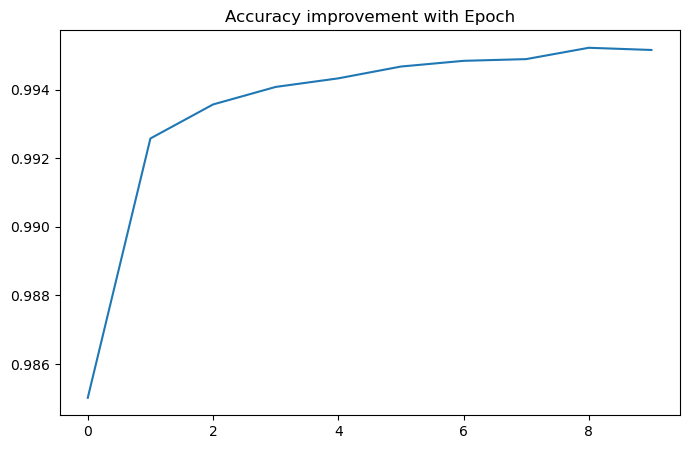

In [13]:
# Show accuracy during training
pd.DataFrame(
    history.history
)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvement with Epoch")
plt.show()

In [14]:
# Input data
# Input data for an approved loan
input_data_approved = {
    'credit_score': [700],  # Greater than 600
    'income': [50000],  # Greater than 40000
    'loan_amount': [10000],  # Less than 15000
    'loan_term_months': [36],  # Any value
    'interest_rate': [0.05],  # Any value
    'employment_status': ['employed'],  # In ["employed", "self-employed", "retired"]
    'loan_purpose': ['car'],  # Not "debt consolidation"
    'credit_history': ['good']  # In ["excellent", "good"]
}

# Input data for a not approved loan
input_data_not_approved = {
    'credit_score': [500],  # Less than or equal to 600
    'income': [30000],  # Less than or equal to 40000
    'loan_amount': [20000],  # Greater than or equal to 15000
    'loan_term_months': [36],  # Any value
    'interest_rate': [0.15],  # High interest rate
    'employment_status': ['unemployed'],  # Not in ["employed", "self-employed", "retired"]
    'loan_purpose': ['debt consolidation'],  # Is "debt consolidation"
    'credit_history': ['poor']  # Not in ["excellent", "good"]
}


def get_prediction(input_data):
    # Convert input data to DataFrame
    input_df = pd.DataFrame.from_dict(input_data)
    
    # Preprocess the input data
    input_data_preprocessed = preprocessor.transform(input_df)
    
    # Predict the class probabilities
    class_probabilities = model.predict(input_data_preprocessed)
    
    # Convert the class probabilities to class labels
    prediction = np.argmax(class_probabilities) # get index of highest probability

    # Find prediction
    prediction = np.argmax(prediction) # get index of highest probability
    print(f"Predicition is: {label_encoder.inverse_transform([prediction])}")
    
    

get_prediction(input_data_approved)
get_prediction(input_data_not_approved)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicition is: [False]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicition is: [False]
